# Lab: Use Image Generator
Learn to use Image Generator

### Runtime
~20 minutes

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print ('tensorflow version :', tf.__version__)
tf.config.experimental.list_physical_devices()

tensorflow version : 2.2.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

## Step 1: Download Data

In [2]:
import os

data_location = 'https://elephantscale-public.s3.amazonaws.com/data/images/cat-dog-redux.zip'

data_location_local = keras.utils.get_file(fname=os.path.basename(data_location),
                                           origin=data_location, extract=True)
print ('local download file: ', data_location_local)
data_dir = os.path.join(os.path.dirname(data_location_local), 'cat-dog-redux')
print ('local data dir: ', data_dir)
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')
print ('train dir:', train_dir)
print ('validation dir:', validation_dir)

local download file:  /home/sujee/.keras/datasets/cat-dog-redux.zip
local data dir:  /home/sujee/.keras/datasets/cat-dog-redux
train dir: /home/sujee/.keras/datasets/cat-dog-redux/train
validation dir: /home/sujee/.keras/datasets/cat-dog-redux/val


In [3]:
from image_utils import print_training_validation_stats

print_training_validation_stats(train_dir, validation_dir)

Found class lables: ['dog', 'cat']

--- training_data (/home/sujee/.keras/datasets/cat-dog-redux/train):  files=500,  size=10.95 MB
       +-- dog :  files=250,  size=6.04 MB
       +-- cat :  files=250,  size=4.92 MB

--- validation_data (/home/sujee/.keras/datasets/cat-dog-redux/val):  files=500,  size=10.92 MB
       +-- dog :  files=250,  size=5.74 MB
       +-- cat :  files=250,  size=5.17 MB


In [4]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Here we are rescaling images by dividing it by 255
## We are shuffling the images to increase randomness
## Images are reshaped to 150x150
## Since we have two images, the class is binary

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
# we can get images per batch

sample_training_images, sample_training_labels = next(train_data_gen)
sample_validation_images, sample_validation_labels = next(val_data_gen)

print ('# sample training images: ', len(sample_training_images))
print ('# sample validation images: ', len(sample_validation_images))
print ('sample training labels : ', sample_training_labels[:10])

# sample training images:  128
# sample validation images:  128
sample training labels :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


training images...


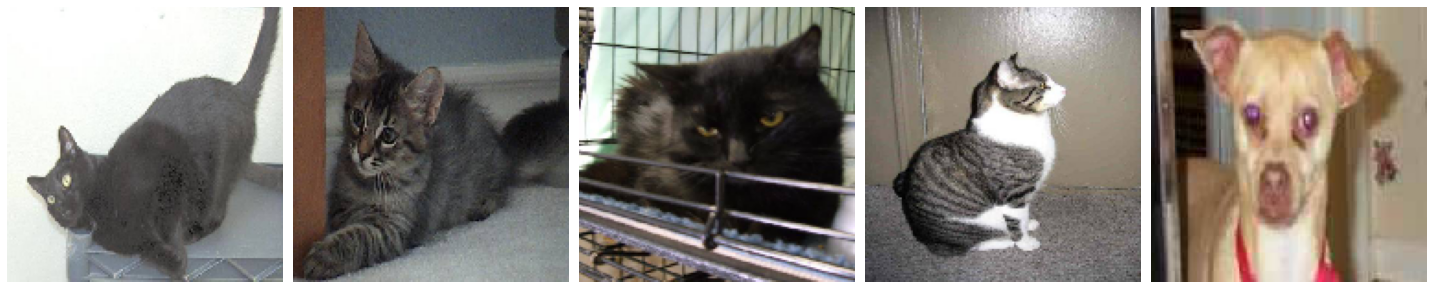

validation images...


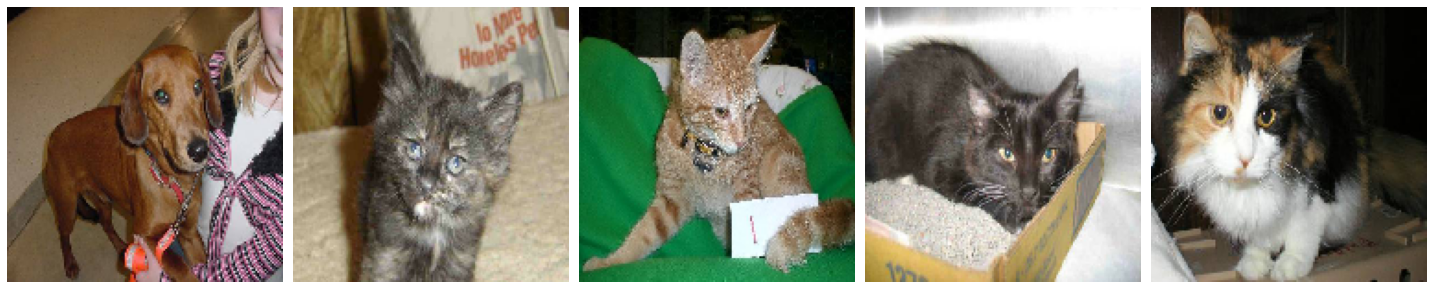

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

print ("training images...")
plotImages(sample_training_images)

print ("validation images...")
plotImages(sample_validation_images)